### Импорт библиотек и загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.svm import SVC
from scipy.stats import zscore

df = pd.read_csv('HIGGS.csv', header=None)

# Доля от общего числа данных
fraction = 1 / 11 

df = df.sample(frac=fraction, random_state=42).reset_index(drop=True)

column_names = ['target'] + [f'feature_{i}' for i in range(1, 29)]
df.columns = column_names

display(df.head())


,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
1,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
2,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
4,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339


### Анализ и чистка данных

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   target      1000000 non-null  float64
 1   feature_1   1000000 non-null  float64
 2   feature_2   1000000 non-null  float64
 3   feature_3   1000000 non-null  float64
 4   feature_4   1000000 non-null  float64
 5   feature_5   1000000 non-null  float64
 6   feature_6   1000000 non-null  float64
 7   feature_7   1000000 non-null  float64
 8   feature_8   1000000 non-null  float64
 9   feature_9   1000000 non-null  float64
 10  feature_10  1000000 non-null  float64
 11  feature_11  1000000 non-null  float64
 12  feature_12  1000000 non-null  float64
 13  feature_13  1000000 non-null  float64
 14  feature_14  1000000 non-null  float64
 15  feature_15  1000000 non-null  float64
 16  feature_16  1000000 non-null  float64
 17  feature_17  1000000 non-null  float64
 18  feature_18  1000000 non

In [3]:
display(df.describe())

missing_values = df.isnull().sum()
display(missing_values)

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.529643,0.992240,-0.000424,-0.000738,0.997736,0.000634,0.991384,-0.001065,0.001071,0.997308,...,-0.000048,0.000395,0.999970,1.034776,1.025050,1.050488,1.009378,0.972388,1.033118,0.959837
std,0.499121,0.565972,1.009573,1.006221,0.599338,1.006416,0.476049,1.009746,1.006235,1.027640,...,1.006850,1.005676,1.400161,0.672544,0.380385,0.164923,0.397437,0.525060,0.364980,0.312920
min,0.000000,0.274697,-2.434976,-1.742508,0.000992,-1.743944,0.137502,-2.969725,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.098896,0.234663,0.118455,0.202636,0.054315,0.295112,0.347556
25%,0.000000,0.590753,-0.740270,-0.872486,0.576640,-0.871214,0.679084,-0.689225,-0.866988,0.000000,...,-0.713357,-0.869814,0.000000,0.791179,0.846099,0.985750,0.767414,0.673409,0.819194,0.770521
50%,1.000000,0.854469,0.000920,-0.001351,0.891414,0.001068,0.895002,-0.002996,0.001824,1.086538,...,0.000372,-0.000264,0.000000,0.895058,0.950491,0.989783,0.916163,0.873080,0.947309,0.872001
75%,1.000000,1.236958,0.738214,0.869884,1.292431,0.871998,1.171015,0.687194,0.870530,2.173076,...,0.713269,0.871051,3.101961,1.024832,1.083350,1.020365,1.141093,1.137706,1.140524,1.059179
max,1.000000,8.749847,2.434868,1.743236,11.613569,1.743257,8.200678,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,25.634193,12.818143,6.159961,10.567759,11.937133,8.657638,6.316113


target        0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
dtype: int64

In [4]:
df.nunique().sort_values()

target             2
feature_21         3
feature_9          3
feature_17         3
feature_13         3
feature_2       5001
feature_19      5999
feature_7       5999
feature_11      5999
feature_15      5999
feature_3       6284
feature_20      6284
feature_8       6284
feature_12      6284
feature_16      6284
feature_18     14006
feature_14     18758
feature_1      19831
feature_10     26940
feature_6      34256
feature_24    185499
feature_23    213500
feature_25    260432
feature_27    352799
feature_28    405965
feature_26    454940
feature_22    502840
feature_4     616603
feature_5     636403
dtype: int64

In [5]:
df.duplicated().sum()

2354

In [6]:
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997646 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   target      997646 non-null  float64
 1   feature_1   997646 non-null  float64
 2   feature_2   997646 non-null  float64
 3   feature_3   997646 non-null  float64
 4   feature_4   997646 non-null  float64
 5   feature_5   997646 non-null  float64
 6   feature_6   997646 non-null  float64
 7   feature_7   997646 non-null  float64
 8   feature_8   997646 non-null  float64
 9   feature_9   997646 non-null  float64
 10  feature_10  997646 non-null  float64
 11  feature_11  997646 non-null  float64
 12  feature_12  997646 non-null  float64
 13  feature_13  997646 non-null  float64
 14  feature_14  997646 non-null  float64
 15  feature_15  997646 non-null  float64
 16  feature_16  997646 non-null  float64
 17  feature_17  997646 non-null  float64
 18  feature_18  997646 non-null  float64
 19  feature

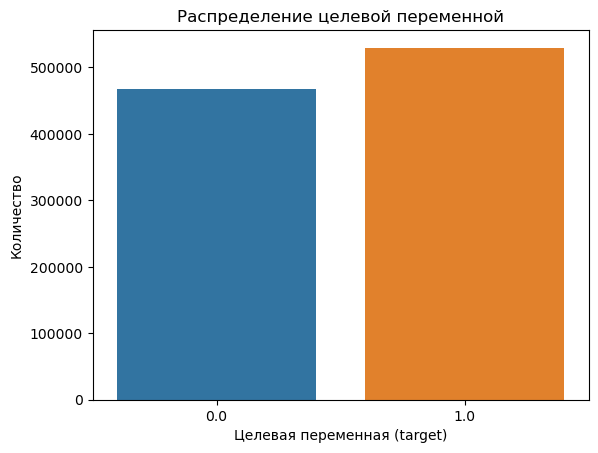

target
1.0    529643
0.0    468003
Name: count, dtype: int64

In [8]:
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.xlabel('Целевая переменная (target)')
plt.ylabel('Количество')
plt.show()

target_frequency = df['target'].value_counts()
display(target_frequency)

### Выделение целевой переменной и масштабирование

In [9]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])

features = df.drop(columns=['target'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.insert(0, 'target', df['target'])

display(df.head())

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
1,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
2,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
4,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339


In [10]:
display(scaled_df.head())

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,0.0,0.258891,-0.719370,-0.005075,-1.324143,0.152224,1.248619,-0.044057,-1.440434,0.086879,...,-2.423347,0.072770,-0.714210,1.123748,1.854646,-0.423878,-0.670001,2.680054,1.375108,0.855862
1,1.0,-1.038262,1.005561,-1.042851,0.231758,-1.395220,4.677677,-1.924960,0.795885,-0.970424,...,-1.166811,-0.907844,-0.714210,0.056508,-0.986794,-0.420482,2.504026,-0.858139,0.583617,1.603503
2,0.0,0.256951,0.322535,1.445264,-0.322843,0.887179,-1.204309,-1.152201,-0.583191,-0.970424,...,0.278329,-0.977368,1.501203,-0.324595,-0.239772,-0.373130,-0.393973,-1.060871,-0.810803,-0.857542
3,0.0,0.686101,-0.589132,-0.721924,-0.888118,-0.057723,-1.243947,-0.074457,1.072450,1.144182,...,1.252785,1.122252,-0.714210,-0.701044,-0.441662,-0.351852,-0.337698,-0.876842,-0.950101,-0.232386
4,1.0,-0.052219,1.180177,-1.153686,0.908170,0.564892,0.726593,0.804213,0.454310,0.086879,...,0.410683,1.301580,1.501203,0.834895,0.320151,3.864051,0.426170,-0.089359,0.167824,0.100923


### Анализ выбросов

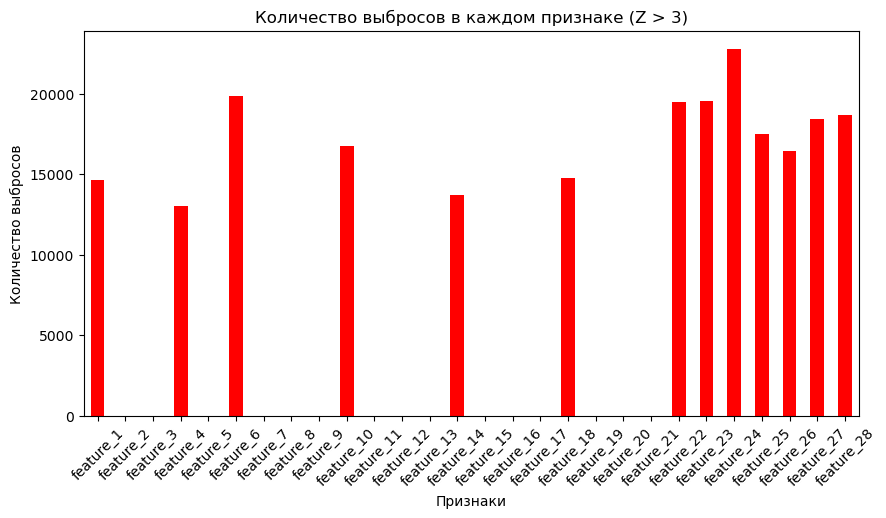

,Признак,Количество выбросов
feature_1,feature_1,14604
feature_2,feature_2,0
feature_3,feature_3,0
feature_4,feature_4,13008
feature_5,feature_5,0
feature_6,feature_6,19852
feature_7,feature_7,0
feature_8,feature_8,0
feature_9,feature_9,0
feature_10,feature_10,16716


In [11]:
clean_df = scaled_df.replace([np.inf, -np.inf], np.nan).dropna()
z_scores = clean_df.drop(columns=['target']).apply(zscore)
outliers = (z_scores > 3).sum()

plt.figure(figsize=(10, 5))
outliers.plot(kind='bar', color='red')
plt.title('Количество выбросов в каждом признаке (Z > 3)')
plt.xlabel('Признаки')
plt.ylabel('Количество выбросов')
plt.xticks(rotation=45)
plt.show()

outlier_info = pd.DataFrame({'Признак': z_scores.columns, 'Количество выбросов': outliers})
display(outlier_info)

### Нормализация данных и создание новых признаков

In [12]:
power_transformer = PowerTransformer(method='yeo-johnson')
power_features = power_transformer.fit_transform(scaled_features)
power_df = pd.DataFrame(power_features, columns=features.columns)
power_df['target'] = df['target'].reset_index(drop=True)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(power_features)
poly_names = poly.get_feature_names_out(features.columns)
poly_df = pd.DataFrame(poly_features, columns=poly_names)
poly_df['target'] = df['target'].reset_index(drop=True)

display(poly_df.head())
poly_df.info()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_25 feature_26,feature_25 feature_27,feature_25 feature_28,feature_26^2,feature_26 feature_27,feature_26 feature_28,feature_27^2,feature_27 feature_28,feature_28^2,target
0,0.584317,-0.719466,-0.004797,-1.809146,0.151712,1.302228,-0.043257,-1.439954,0.205506,1.276567,...,-1.622622,-1.132216,-0.896453,4.160065,2.902765,2.298318,2.025460,1.603696,1.269756,0.0
1,-1.452643,1.005582,-1.042889,0.468389,-1.394745,2.647917,-1.926930,0.795741,-0.981587,1.920775,...,-2.098830,1.737072,2.969958,1.185697,-0.981328,-1.677825,0.812185,1.388632,2.374213,1.0
2,0.582471,0.322330,1.444980,-0.164211,0.887100,-1.804916,-1.152535,-0.583480,-0.981587,-0.725308,...,0.400038,0.290722,0.328564,2.252412,1.636907,1.849975,1.189599,1.344443,1.519442,0.0
3,0.939182,-0.589271,-0.721808,-1.018987,-0.058248,-1.895571,-0.073662,1.072543,1.128996,-0.756409,...,0.191531,0.240165,-0.003632,1.266692,1.588337,-0.024020,1.991656,-0.030119,0.000455,0.0
4,0.249501,1.180283,-1.153787,1.027459,0.564560,0.954906,0.804422,0.453951,0.205506,-1.113184,...,0.119427,0.398981,0.368122,0.023712,0.079218,0.073090,0.264649,0.244179,0.225293,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997646 entries, 0 to 997645
Columns: 435 entries, feature_1 to target
dtypes: float64(435)
memory usage: 3.2 GB


### Разделение данных на необходимые для экспериментов выборки и сохрание в виде csv файлов

In [14]:
import os

output_dir = 'data_subsets_higgs'
os.makedirs(output_dir, exist_ok=True)

sample_sizes = [10000, 50000, 100000, 500000, 997646]
feature_counts = [10, 50, 100, 200, 434]

def process_dataset(dataset, n_features):
    feature_cols = dataset.columns.drop('target')[:n_features] 
    selected_features = dataset[feature_cols].copy()
    selected_features['target'] = dataset['target'].values 
    return selected_features

for size in sample_sizes:
    if size > len(poly_df):
        print(f"Размер выборки {size} превышает размер датасета. Пропускаем.")
        continue
    
    subset = poly_df.sample(n=size, random_state=42)
    
    for count in feature_counts:
        if count > len(subset.columns) - 1:
            print(f"Количество признаков {count} превышает доступное для выборки {size}. Пропускаем.")
            continue
        
        processed_dataset = process_dataset(subset.copy(), count)
        
        filename = f'{output_dir}/subset_{size}_features_{count}.csv'
        processed_dataset.to_csv(filename, index=False)
        print(f'Saved: {filename}')

Saved: data_subsets_higgs/subset_10000_features_10.csv
Saved: data_subsets_higgs/subset_10000_features_50.csv
Saved: data_subsets_higgs/subset_10000_features_100.csv
Saved: data_subsets_higgs/subset_10000_features_200.csv
Saved: data_subsets_higgs/subset_10000_features_434.csv
Saved: data_subsets_higgs/subset_50000_features_10.csv
Saved: data_subsets_higgs/subset_50000_features_50.csv
Saved: data_subsets_higgs/subset_50000_features_100.csv
Saved: data_subsets_higgs/subset_50000_features_200.csv
Saved: data_subsets_higgs/subset_50000_features_434.csv
Saved: data_subsets_higgs/subset_100000_features_10.csv
Saved: data_subsets_higgs/subset_100000_features_50.csv
Saved: data_subsets_higgs/subset_100000_features_100.csv
Saved: data_subsets_higgs/subset_100000_features_200.csv
Saved: data_subsets_higgs/subset_100000_features_434.csv
Saved: data_subsets_higgs/subset_500000_features_10.csv
Saved: data_subsets_higgs/subset_500000_features_50.csv
Saved: data_subsets_higgs/subset_500000_features_